# Data Loading using GPU

In [3]:
import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm  # Import tqdm

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

base_folder = "../datasets/vision/Vision_data"
train_folder = os.path.join(base_folder, "train")
test_folder = os.path.join(base_folder, "test")
validation_folder = os.path.join(base_folder, "validation")

# Load datasets
train_dataset = ImageFolder(root=train_folder, transform=transform)
test_dataset = ImageFolder(root=test_folder, transform=transform)
val_dataset = ImageFolder(root=validation_folder, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

Loading ../datasets/vision/Vision_data\train: 100%|██████████| 35/35 [14:39<00:00, 25.13s/it]


In [4]:
import matplotlib.pyplot as plt
import os
import random
from torchvision import transforms

# Function to unnormalize and convert a tensor to PIL image

def tensor_to_pil(tensor):
    # Unnormalize
    tensor = tensor.clone()  # Clone to not modify the original tensor
    tensor = tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    tensor = tensor + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    tensor = tensor.clamp(0, 1)
    # Convert to PIL Image
    return transforms.ToPILImage()(tensor)

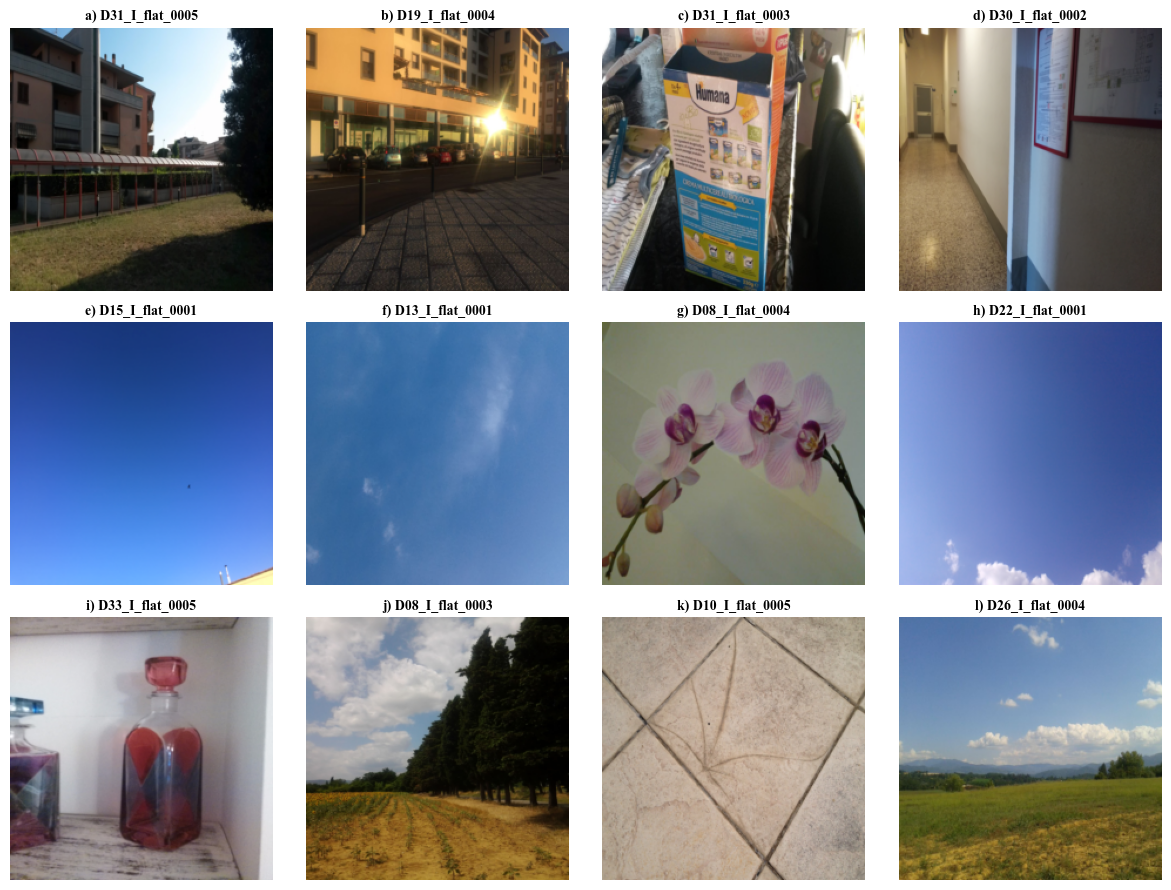

In [5]:
# Randomly select 12 images from train_images
selected_indices = random.sample(range(len(train_images)), 12)
selected_images = [train_images[i] for i in selected_indices]

# Alphabetical labels from 'a' to 'l'
labels = [chr(i) for i in range(ord('a'), ord('l')+1)]

# Create a figure with 3 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

for i, (image_tensor, filename) in enumerate(selected_images):
    ax = axes[i // 4, i % 4]  # Locate subplot position
    img = tensor_to_pil(image_tensor.cpu())  # Convert tensor to PIL Image
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    # Set subplot title with alphabetical label and filename (without extension)
    file_name_without_ext = os.path.splitext(os.path.basename(filename))[0]
    ax.set_title(f"{labels[i]}) {file_name_without_ext}", fontsize=10, fontweight="bold", fontname="Times New Roman")

plt.tight_layout()

# Save the figure
output_folder = "../output/"
os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist
plt.savefig(os.path.join(output_folder, "random_train_images.jpg"), dpi=300)

plt.show()  # Display the figure


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader

# Assuming train_images and other dataset-related code are already defined

# Select a ResNet model and load pretrained weights
model = models.resnet18(weights=True)

# Modify the final layer for 28 classes
num_classes = 28
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for your dataset (get the train laoder from the top)
# Replace with your dataset loading logic
# train_dataset = # Your dataset loading code here
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for inputs, labels in train_images:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), '../models/resnet18_custom.pth')

c:\Program Files\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AttributeError: 'str' object has no attribute 'to'